In [1]:
import cv2
import tensorflow as tf
import tensorflow.keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, Flatten, Dense, MaxPooling2D, Dropout, BatchNormalization
from tensorflow.keras.preprocessing import image
from keras.regularizers import l2
import os
import matplotlib.pyplot as plt
import random
import shutil
import numpy as np

In [2]:
from tensorflow.keras.applications import NASNetMobile

In [3]:
nasa_net = NASNetMobile(weights = "imagenet", include_top = False, input_shape = (224,224,3))

In [4]:
for layer in nasa_net.layers[:]:
    layer.trainable = False

for layer in nasa_net.layers[:]:
    print(layer, layer.trainable)

<keras.engine.input_layer.InputLayer object at 0x0000022EE6216880> False
<keras.layers.convolutional.Conv2D object at 0x0000022EE62608E0> False
<keras.layers.normalization.batch_normalization.BatchNormalization object at 0x0000022EE6260FD0> False
<keras.layers.core.activation.Activation object at 0x0000022EE6332F10> False
<keras.layers.convolutional.Conv2D object at 0x0000022EE6332610> False
<keras.layers.normalization.batch_normalization.BatchNormalization object at 0x0000022EE63F9340> False
<keras.layers.core.activation.Activation object at 0x0000022EE6422100> False
<keras.layers.core.activation.Activation object at 0x0000022EE64551F0> False
<keras.layers.convolutional.ZeroPadding2D object at 0x0000022EE6422D60> False
<keras.layers.convolutional.ZeroPadding2D object at 0x0000022EEC4D7CA0> False
<keras.layers.convolutional.SeparableConv2D object at 0x0000022EE6425FA0> False
<keras.layers.convolutional.SeparableConv2D object at 0x0000022EE645C520> False
<keras.layers.normalization.batc

In [5]:
model = Sequential()

# inserting the conv layers on top of the base classification layer
model.add(nasa_net)  

# creating the classification layers
model.add(Flatten())
model.add(Dense(units = 512, activation = 'relu', use_bias = True))
model.add(Dense(units=1, activation = 'sigmoid'))

model.compile(loss = 'binary_crossentropy', optimizer = "adam", metrics = ['accuracy'])

In [6]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 NASNet (Functional)         (None, 7, 7, 1056)        4269716   
                                                                 
 flatten (Flatten)           (None, 51744)             0         
                                                                 
 dense (Dense)               (None, 512)               26493440  
                                                                 
 dense_1 (Dense)             (None, 1)                 513       
                                                                 
Total params: 30,763,669
Trainable params: 26,493,953
Non-trainable params: 4,269,716
_________________________________________________________________


In [7]:
Dataset = r"C:\Users\Teja Nikhil\OneDrive\Desktop\COVID-19_Radiography_Dataset\covid_direc"

In [8]:
train_datagen = image.ImageDataGenerator(rescale = 1./255,
                                                                    #width_shift_range = 0.2,
                                                                    #brightness_range = [0.2,1],
                                                                    #horizontal_flip = True,
                                                                    #zoom_range = 0.2,
                                                                    validation_split=0.2)

train_data = train_datagen.flow_from_directory(Dataset,
                                                                            subset = 'training',
                                                                            class_mode = 'binary',
                                                                            target_size = (224, 224) 
                                                                            )

validation_data =  train_datagen.flow_from_directory(Dataset,
                                                                                     subset = 'validation',
                                                                                     class_mode = 'binary',
                                                                                     target_size = (224, 224)
                                                                                     )

Found 5779 images belonging to 2 classes.
Found 1444 images belonging to 2 classes.


In [10]:
history = model.fit(train_data, validation_data = validation_data, epochs = 20, batch_size = 32, steps_per_epoch = 10)

Epoch 1/20
10/10 [==============================] - 76s 8s/step - loss: 0.8115 - accuracy: 0.8938 - val_loss: 0.8873 - val_accuracy: 0.8934
Epoch 2/20
10/10 [==============================] - 65s 7s/step - loss: 0.5044 - accuracy: 0.9125 - val_loss: 0.5469 - val_accuracy: 0.9141
Epoch 3/20
10/10 [==============================] - 64s 7s/step - loss: 0.6917 - accuracy: 0.9125 - val_loss: 0.6975 - val_accuracy: 0.9211
Epoch 4/20
10/10 [==============================] - 64s 7s/step - loss: 0.6155 - accuracy: 0.9094 - val_loss: 1.0811 - val_accuracy: 0.8705
Epoch 5/20
10/10 [==============================] - 66s 7s/step - loss: 0.5878 - accuracy: 0.9000 - val_loss: 0.5772 - val_accuracy: 0.9224
Epoch 6/20
10/10 [==============================] - 66s 7s/step - loss: 0.2970 - accuracy: 0.9438 - val_loss: 0.5140 - val_accuracy: 0.9169
Epoch 7/20
10/10 [==============================] - 66s 7s/step - loss: 0.4308 - accuracy: 0.9094 - val_loss: 0.9307 - val_accuracy: 0.8961
Epoch 8/20
10/10 [==

In [11]:
model_json = model.to_json()
with open("covid_nasanetnet.json", "w") as json_file:
    json_file.write(model_json)
# serialize weights to HDF5
model.save_weights("covid_nasanet.h5")

C:\Users\Teja Nikhil\anaconda3\lib\site-packages\keras\engine\functional.py:1410: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  layer_config = serialize_layer_fn(layer)


In [8]:
model.load_weights("covid_nasanet.h5")

In [9]:
def read_img(img_path):
    image = cv2.imread(img_path)
    resized_image = cv2.resize(image, (224,224), interpolation = cv2.INTER_AREA)
    return resized_image

test_image1 = read_img(r"C:\Users\Teja Nikhil\OneDrive\Desktop\COVID-19_Radiography_Dataset\Testing\COVID-12.png")
print(f"Shape of the image: {test_image1.shape}")
test_image1 = test_image1[np.newaxis,:,:,:]
model.predict(test_image1)

Shape of the image: (224, 224, 3)


array([[0.]], dtype=float32)

In [12]:
Test_Dir = r"C:\Users\Teja Nikhil\OneDrive\Desktop\COVID-19_Radiography_Dataset\Testing"
Testing_Images = os.listdir(Test_Dir)
Predictions = []
for i in Testing_Images:
    direc = os.path.join(Test_Dir, i)
    test_image = read_img(direc)
    test_image = test_image[np.newaxis,:,:,:]
    Predictions.append(model.predict(test_image))
    
preds = Predictions

In [13]:
from tensorflow.keras.applications.imagenet_utils import decode_predictions
import skimage.io 
import skimage.segmentation
import copy
import sklearn
import sklearn.metrics
import pandas as pd
from sklearn.linear_model import LinearRegression
import warnings
warnings.filterwarnings("ignore")
print('Notebook running: keras ', tensorflow.keras.__version__)
np.random.seed(222)

Notebook running: keras  2.7.0


In [15]:
def readImage(Image_Path):
    image = cv2.imread(Image_Path)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    image = skimage.transform.resize(image, (224 ,224)) 
    return image

def draw_Img(img, title = "Image"):
    plt.imshow(img)
    plt.axis('off')
    plt.style.use('seaborn')
    plt.title(title+str(img.shape))
    skimage.io.imshow(Image) 
    plt.show()

def Generate_Superpixels(Image, pixel_dist):
    superpixels = skimage.segmentation.quickshift(Image, kernel_size = 3, max_dist = pixel_dist, ratio = 0.2)
    num_superpixels = np.unique(superpixels).shape[0]
    print(f"Number of Super pixels generated: {num_superpixels}")
    return num_superpixels
def url_to_image(url):
    resp = urllib.request.urlopen(url)
    image = np.asarray(bytearray(resp.read()), dtype="uint8")
    image = cv2.imdecode(image, cv2.IMREAD_COLOR)
    return image

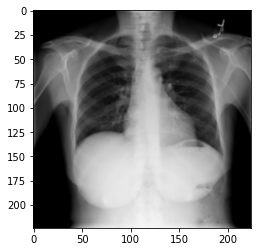

In [72]:
Image_Path =  r"C:\Users\Teja Nikhil\OneDrive\Desktop\COVID-19_Radiography_Dataset\Testing\Normal-9.png"
Image = readImage(Image_Path)
plt.imshow(Image)

Number of Super pixels generated: 55


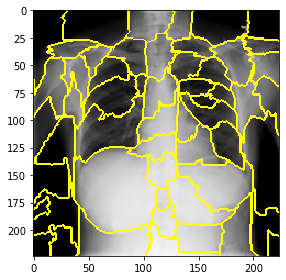

In [73]:
# draw_Img(Image)
num_superpixels , super_pixels = Generate_Superpixels(Image, 200)
skimage.io.imshow(skimage.segmentation.mark_boundaries(Image, super_pixels))

Changes in the superpixels in each perturbations are: 55
Number of perturbations: 150


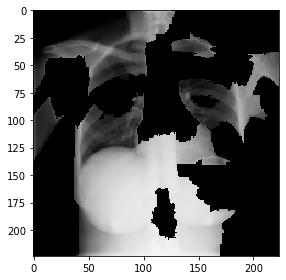

In [74]:
perturbations = Generate_Perturbations(150)
skimage.io.imshow(perturb_Image(Image, perturbations[0],super_pixels))

In [75]:
Perturbated_Df = pd.DataFrame(perturbations.flatten())
Perturbated_Df.shape
predictions = []

In [76]:
for pert in perturbations:
    perturbed_img = perturb_Image(Image,pert,super_pixels)
    pred = model.predict(perturbed_img[np.newaxis,:,:,:])
    predictions.append(pred)

In [77]:
predictions = np.array(predictions)

In [78]:
distances = Compute_Distances(num_superpixels, perturbations)

weights = Compute_weights(distances, 0.25)

In [79]:
coeffs = fit_weights(perturbations, predictions, weights)

[[1.]]


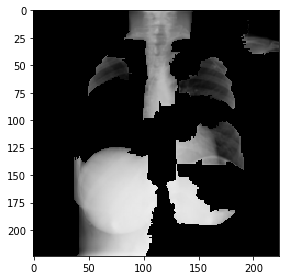

In [87]:
print(model.predict(Image[np.newaxis,:,:,:]))
mask_image(Image, num_superpixels, super_pixels, 15, coeffs)

In [81]:
import lime
from lime import lime_image
from skimage.segmentation import mark_boundaries
import matplotlib.pyplot as plt
import random
import numpy as np

In [82]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
def Preprocess_Data(Img):
    Image = cv2.resize(Img, (224, 224), interpolation=cv2.INTER_CUBIC)
    return Image

def Lime_Explain(Img, Model):
    explainer = lime_image.LimeImageExplainer(random_state=42)
    explanation = explainer.explain_instance(
          Img.astype('float'), 
          Model.predict
    )
    image1, mask = explanation.get_image_and_mask(
          Model.predict(Img.reshape(-1,224,224,3)).argmax(axis=1)[0],
          positive_only=True, 
          num_features = 5,
          hide_rest=True)
    image2, heatmap = explanation.get_image_and_mask(
          explanation.top_labels[0], 
          positive_only=False, 
          num_features=10, 
          hide_rest=False)
  
    return image1, mask, image2, heatmap

def predict_plot(Img, Model):
    Image = Preprocess_Data(Img)
    image1, masked, image2, heatmap = Lime_Explain(Image, model)
    print(Model.predict(Image.reshape(-1,224,224,3)))
    fig = plt.figure(figsize=(10, 7))
    fig.add_subplot(1, 3, 1)
    plt.imshow(Image)
    plt.axis('on')
    plt.title("Original Image")

    fig.add_subplot(1, 3, 2)
    plt.imshow(mark_boundaries(image1, masked))
    plt.axis('on')
    plt.title("Masked image")
    
  # fig.add_subplot(1, 3, 3)
  # plt.imshow(Image)
  # plt.axis('on')
  # plt.title("Original Image")

    fig.add_subplot(1, 3, 3)
    plt.imshow(mark_boundaries(image2, heatmap))
    plt.axis('on')
    plt.title("Masked heatmap")


[[1.]]


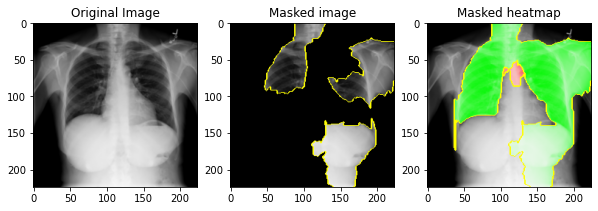

In [83]:
predict_plot(Image, model)